# Creating a Custom Filter

---

Prof. Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

This notebook is based on Udacity's *Deep Learning Nanodegree*.

### Import resources and display image

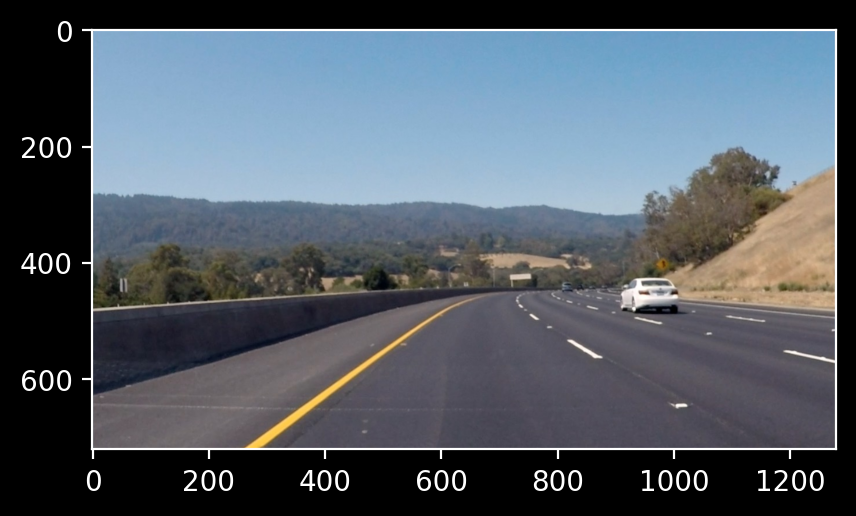

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('../images/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

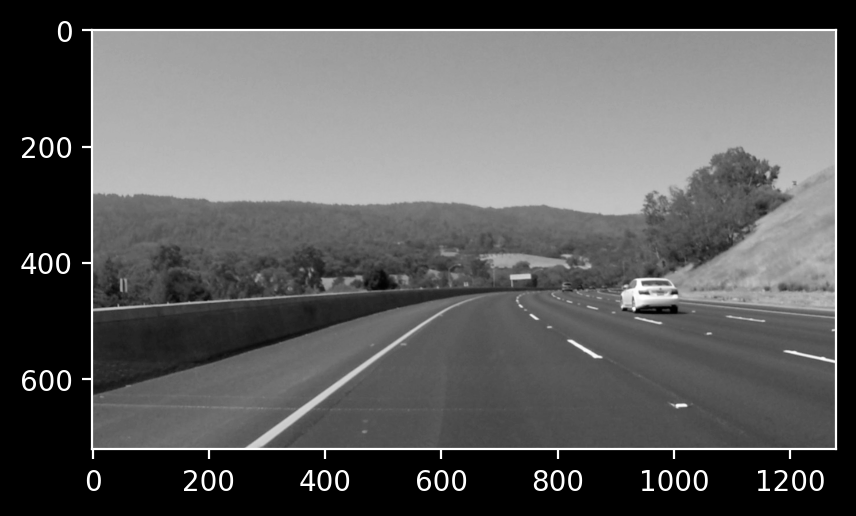

In [4]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="../images/sobel.png" width=200 height=200>

**TODO:** It's up to you to create a Sobel x operator and apply it to the given image. Plot the result. Can you see from the resulting image which is the x-derivative and which the y-derivative?


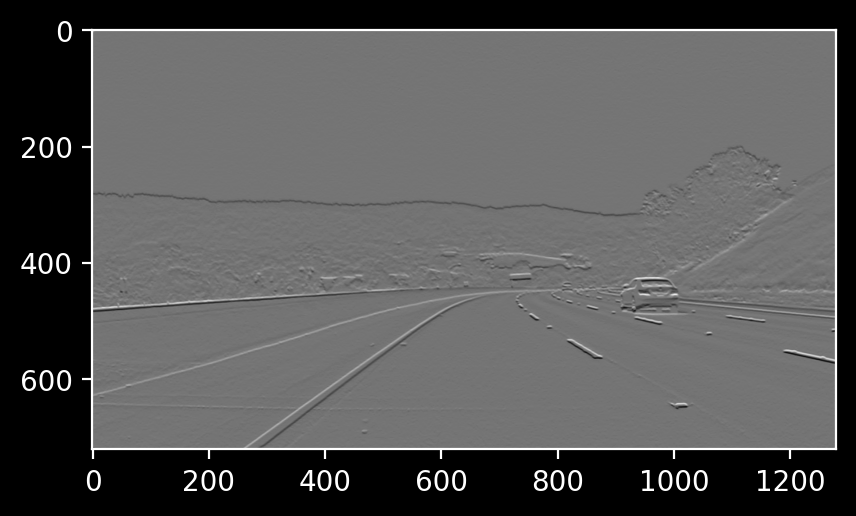

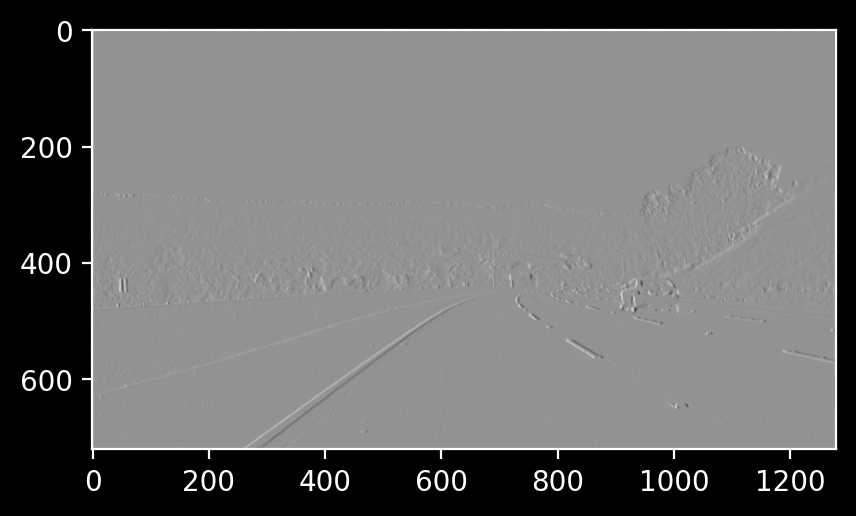

In [5]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_y_image = cv2.filter2D(gray, cv2.CV_64F, sobel_y)

plt.imshow(filtered_y_image, cmap='gray')
plt.show()

## TODO: Create and apply a Sobel x operator

sobel_x = sobel_y.T # transponierter sobel_y
filtered_x_image = cv2.filter2D(gray, cv2.CV_64F, sobel_x) 

plt.imshow(filtered_x_image, cmap='gray')
plt.show()

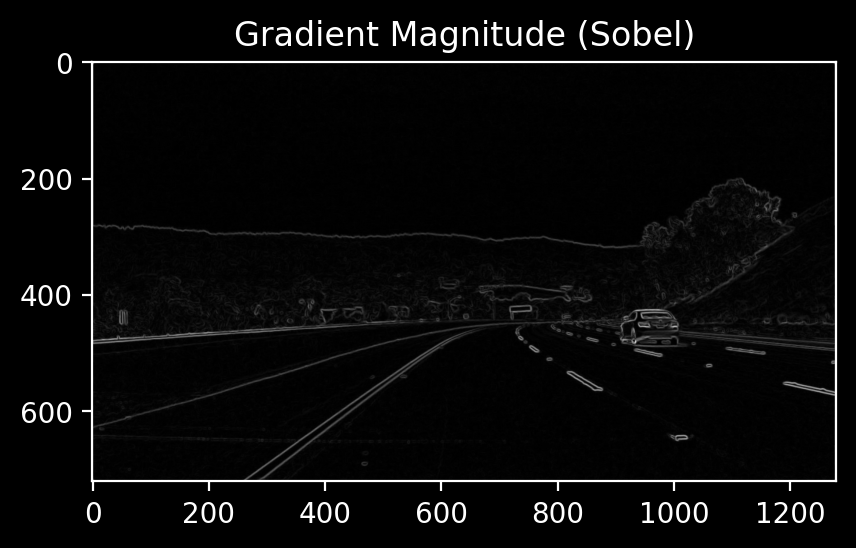

In [6]:
# calculate magnitude

# Betrag des Gradientenvektors (Pythagoras)
magnitude = np.sqrt(filtered_x_image**2 + filtered_y_image**2)
magnitude_norm = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

plt.imshow(magnitude_norm, cmap='gray')
plt.title("Gradient Magnitude (Sobel)")
plt.show()

**TODO:** For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

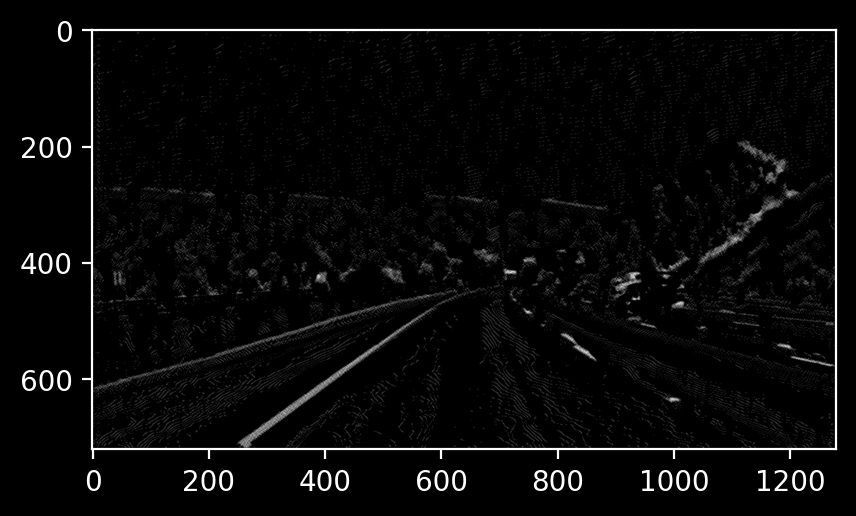

In [21]:
# YOUR CODE HERE
k = 21 # kernel size
blur_kernel = np.ones((k,k)) / np.ones((k, k)).size
blurred_image = cv2.filter2D(gray, -1, blur_kernel)
sobel_x_image = cv2.filter2D(blurred_image, -1, sobel_x)
sobel_y_image = cv2.filter2D(sobel_x_image, -1, sobel_y)
plt.imshow(sobel_y_image, cmap='gray')
plt.show()

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a 5x5 or 7x7 filter
* Apply your filters to the other images.

